<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/WMA_21Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Per chatGPT: The choice of

40 and

100 days for the Weighted Moving Average (WMA) in the example was somewhat arbitrary and meant to provide a starting point. In practice, the choice of time windows for moving averages, whether they are simple (SMA) or weighted (WMA), is typically based on historical market conventions, empirical testing, and the specific investment objectives.

The
50
50-day and
200
200-day SMAs are indeed among the most widely recognized and used time frames in the financial markets, especially for equities: The
50
50-day SMA often represents an intermediate trend. A stock trading above its
50
50-day SMA is considered to be in an intermediate uptrend, and vice versa.
The
200
200-day SMA is a measure of the long-term trend. A stock trading above its
200
200-day SMA is seen as having a long-term uptrend, and vice versa.
When the
50
50-day SMA crosses above the
200
200-day SMA, it's called a "Golden Cross," typically seen as a bullish signal. Conversely, when the
50
50-day SMA crosses below the
200
200-day SMA, it's termed a "Death Cross," which is usually interpreted as a bearish signal.

For the WMA or any other type of moving average, there's no strict rule on which periods to use. The idea is to capture short-term and long-term trends, and the specific periods might be adjusted based on back-testing to see which provide the best signals for a given asset or market.

If you'd like to stick to market conventions, you can certainly adjust the WMA periods to
50
50 and
200
200 days, similar to the SMA. However, always remember to back-test any strategy on historical data to gauge its effectiveness and potential pitfalls.

[*********************100%%**********************]  1 of 1 completed


<ipython-input-18-cbcec30ec126>:25: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[short_window:, 'signal'] = np.where(data['short_wma'][short_window:] > data['long_wma'][short_window:], 1.0, 0.0)


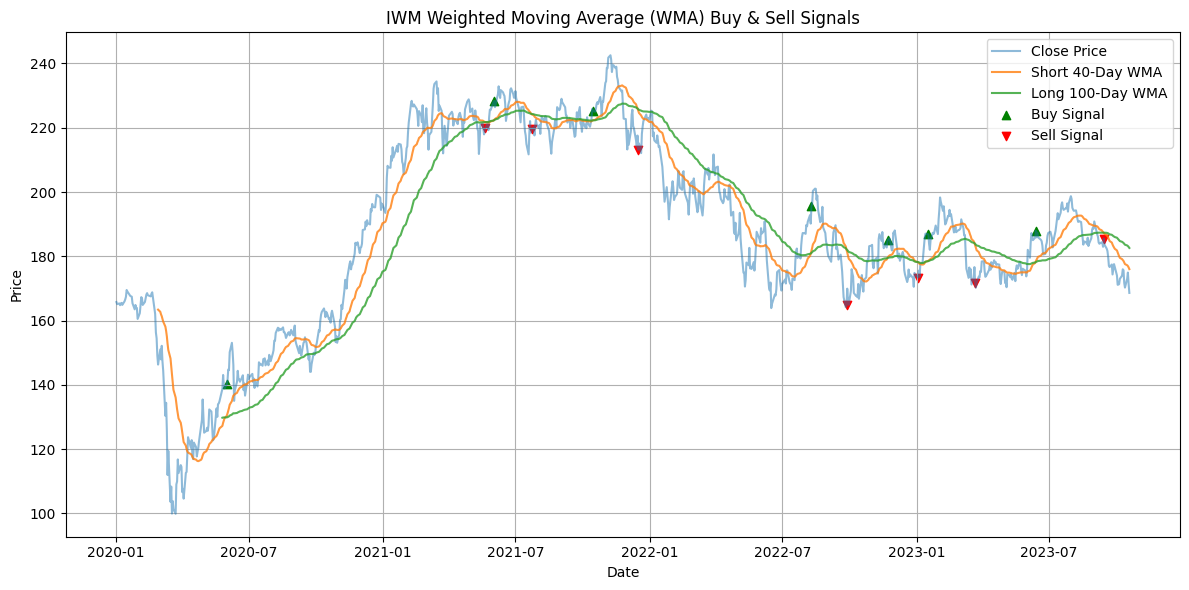

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def compute_wma(data, window):
    """Compute Weighted Moving Average."""
    weights = np.arange(1, window + 1)
    return data.rolling(window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

def fetch_data(ticker):
    """Fetch stock data from Yahoo Finance."""
    return yf.download(ticker, start="2020-01-01", end="2023-10-20")

def plot_wma(ticker, data):
    """Plot stock price, WMAs, and buy/sell signals."""
    # Compute WMAs
    short_window = 40
    long_window = 100
    data['short_wma'] = compute_wma(data['Close'], short_window)
    data['long_wma'] = compute_wma(data['Close'], long_window)

    # Buy/Sell signals
    data['signal'] = 0.0
    data.loc[short_window:, 'signal'] = np.where(data['short_wma'][short_window:] > data['long_wma'][short_window:], 1.0, 0.0)
    data['positions'] = data['signal'].diff()

    # Plotting
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data['short_wma'], label=f'Short {short_window}-Day WMA', alpha=0.8)
    plt.plot(data['long_wma'], label=f'Long {long_window}-Day WMA', alpha=0.8)

    # Extracting buy/sell data points
    buy_signals = data[data['positions'] == 1.0]
    sell_signals = data[data['positions'] == -1.0]

    plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', alpha=1, color='g')
    plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', alpha=1, color='r')

    plt.title(f'{ticker} Weighted Moving Average (WMA) Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

ticker = 'IWM'
data = fetch_data(ticker)
plot_wma(ticker, data)
